In [1]:
import xymass
import numpy as np
import scipy
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#sample 10000 stars from flattened Plummer distribution with Plummer scale radius = 5 (arbitrary units), ellipticity=0.5, position angle = 35 degrees
plum=xymass.sample_r2d(10000,'plum',r_scale=5.,ellipticity=0.5,position_angle=35.)

#sample 20000 stars from flattened exponential distribution with exponential scale radius = 7 (arbitrary units), ellipticity=0.2, position angle = 65 degrees
exp=xymass.sample_r2d(20000,'exp',r_scale=7.,ellipticity=0.2,position_angle=65.)

#sample 5000 stars from flattened '2bg' distribution with scale radius = 10., ellipticity=0.15, position angle = 40 degrees, outer power-law index beta=10, inner power-law index gamma=0.9
tbg=xymass.sample_r2d(5000,'2bg',r_scale=10.,ellipticity=0.15,position_angle=40.,beta=10.,gamma=0.9)

#sample 50000 stars from uniform distribution within circle of radius 15 (arbitrary units)
uni=xymass.sample_r2d(50000,'uni',r_scale=15.)

In [3]:
#make histogram from sampled data (plummer), binning by sampled elliptical radius
hist_plum=np.histogram(plum.r_ell/plum.r_scale,bins=50,range=[0,10])
plum_bin_radius=[]
plum_bin_area=[]
for i in range(0,len(hist_plum[0])):
    plum_bin_radius.append(np.mean([hist_plum[1][i],hist_plum[1][i+1]]))
    plum_bin_area.append(np.pi*plum.r_scale**2*(hist_plum[1][i+1]**2-hist_plum[1][i]**2))
plum_bin_radius=np.array(plum_bin_radius)
plum_bin_area=np.array(plum_bin_area)
plum_bin_surface_density=hist_plum[0]/plum_bin_area
plum_bin_surface_density_err=np.sqrt(hist_plum[0])/plum_bin_area

In [4]:
#make histogram from sampled data (exponential), binning by sampled elliptical radius
hist_exp=np.histogram(exp.r_ell/exp.r_scale,bins=50,range=[0,10])
exp_bin_radius=[]
exp_bin_area=[]
for i in range(0,len(hist_exp[0])):
    exp_bin_radius.append(np.mean([hist_exp[1][i],hist_exp[1][i+1]]))
    exp_bin_area.append(np.pi*exp.r_scale**2*(hist_exp[1][i+1]**2-hist_exp[1][i]**2))
exp_bin_radius=np.array(exp_bin_radius)
exp_bin_area=np.array(exp_bin_area)
exp_bin_surface_density=hist_exp[0]/exp_bin_area
exp_bin_surface_density_err=np.sqrt(hist_exp[0])/exp_bin_area

In [5]:
#make histogram from sampled data (beta/gamma), binning by sampled elliptical radius
hist_tbg=np.histogram(tbg.r_ell/tbg.r_scale,bins=50,range=[0,10])
tbg_bin_radius=[]
tbg_bin_area=[]
for i in range(0,len(hist_tbg[0])):
    tbg_bin_radius.append(np.mean([hist_tbg[1][i],hist_tbg[1][i+1]]))
    tbg_bin_area.append(np.pi*tbg.r_scale**2*(hist_tbg[1][i+1]**2-hist_tbg[1][i]**2))
tbg_bin_radius=np.array(tbg_bin_radius)
tbg_bin_area=np.array(tbg_bin_area)
tbg_bin_surface_density=hist_tbg[0]/tbg_bin_area
tbg_bin_surface_density_err=np.sqrt(hist_tbg[0])/tbg_bin_area

In [6]:
#make histogram from sampled data (uniform), binning by sampled elliptical radius
hist_uni=np.histogram(uni.r_ell/uni.r_scale,bins=50,range=[0,1])
uni_bin_radius=[]
uni_bin_area=[]
for i in range(0,len(hist_uni[0])):
    uni_bin_radius.append(np.mean([hist_uni[1][i],hist_uni[1][i+1]]))
    uni_bin_area.append(np.pi*uni.r_scale**2*(hist_uni[1][i+1]**2-hist_uni[1][i]**2))
uni_bin_radius=np.array(uni_bin_radius)
uni_bin_area=np.array(uni_bin_area)
uni_bin_surface_density=hist_uni[0]/uni_bin_area
uni_bin_surface_density_err=np.sqrt(hist_uni[0])/uni_bin_area

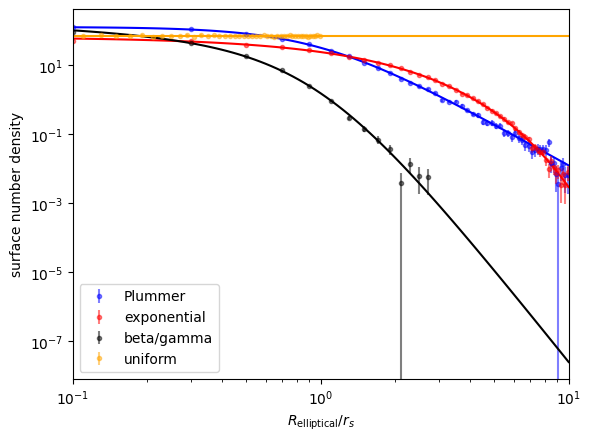

In [7]:
#plot analytic functions
x=np.logspace(-1.2,1,100)
y_plum=plum.func(x)
y_exp=exp.func(x)
y_tbg=tbg.func(x)
y_uni=uni.func(x)

#plot surface number density profiles from samples
plt.errorbar(plum_bin_radius,plum_bin_surface_density,yerr=plum_bin_surface_density_err,fmt='.',label='Plummer',color='b',alpha=0.5)                                                                                                                              
plt.plot(x,y_plum,color='b')

plt.errorbar(exp_bin_radius,exp_bin_surface_density,yerr=exp_bin_surface_density_err,fmt='.',label='exponential',color='r',alpha=0.5)                                                                                                                              
plt.plot(x,y_exp,color='r')                                                                                                                                     

plt.errorbar(tbg_bin_radius,tbg_bin_surface_density,yerr=tbg_bin_surface_density_err,fmt='.',label='beta/gamma',color='k',alpha=0.5)                                                                                                                              
plt.plot(x,y_tbg,color='k')                                                                                                                                     

plt.errorbar(uni_bin_radius,uni_bin_surface_density,yerr=uni_bin_surface_density_err,fmt='.',label='uniform',color='orange',alpha=0.5)                                                                                                                              
plt.plot(x,y_uni,color='orange')

plt.xscale('log')                                                                                                                                 
plt.yscale('log')   
plt.xlim([0.1,10])
plt.xlabel(r'$R_{\rm elliptical}/r_{s}$')
plt.ylabel('surface number density')
plt.legend(loc=3)
plt.show()
plt.close()